> 我们正式进入回归问题 (Regression) 的篇章。和分类问题（猜它是谁）不同，回归问题的核心是 **“猜它多少”**（预测一个连续的数值，比如房价、气温、销量）。
> 我们将使用 加州房价数据集
> - 来源：UCI 机器学习库（经典工程数据集）。
> - 背景：根据经度、纬度、房龄、平均房间数、平均卧室数、人口数、平均居住人数、收入中位数等 8 个特征，预测房价中位数。

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- 1. 全局绘图设置 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
sns.set(style="whitegrid", font='SimHei')    # Seaborn 也要同步设置字体

from sklearn.datasets import fetch_california_housing  
housing = fetch_california_housing(as_frame=True) 
df=housing.frame

df.columns=[
    'MedInc (中位收入)', 
    'HouseAge (房龄)', 
    'AveRooms (平均房间数)', 
    'AveBedrms (平均卧室数)', 
    'Population (人口)', 
    'AveOccup (平均居住人数)', 
    'Latitude (纬度)', 
    'Longitude (经度)', 
    'MedHouseVal (房价中位数)'
]
df.head()

,MedInc (中位收入),HouseAge (房龄),AveRooms (平均房间数),AveBedrms (平均卧室数),Population (人口),AveOccup (平均居住人数),Latitude (纬度),Longitude (经度),MedHouseVal (房价中位数)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MedInc (中位收入)        20640 non-null  float64
 1   HouseAge (房龄)        20640 non-null  float64
 2   AveRooms (平均房间数)     20640 non-null  float64
 3   AveBedrms (平均卧室数)    20640 non-null  float64
 4   Population (人口)      20640 non-null  float64
 5   AveOccup (平均居住人数)    20640 non-null  float64
 6   Latitude (纬度)        20640 non-null  float64
 7   Longitude (经度)       20640 non-null  float64
 8   MedHouseVal (房价中位数)  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
X=housing.data
y=housing.target

# 或者：
# X=df.iloc[:, :-1]
# y=df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
regressors = {
    "Linear Regression (线性回归)": LinearRegression(),
    "Decision Tree (决策树)": DecisionTreeRegressor(random_state=42),
    "Random Forest (随机森林)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting (梯度提升)": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []      # 用于存指标
preds_dict = {}   # 用于存预测结果(画图用)

for name, model in regressors.items():
    # A. 训练
    model.fit(X_train, y_train)
    
    # B. 预测
    y_pred = model.predict(X_test)
    preds_dict[name] = y_pred # 存下来画图
    
    # C. 计算核心指标
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # D. 记录结果
    results.append({
        "模型名称": name,
        "R2": r2,      # 决定系数
        "RMSE": rmse,  # 均方根误差
        "MAE": mae     # 平均绝对误差
    })
    print(f"模型 {name} 训练完成。R2 = {r2:.4f}")
    
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("\n" + "="*30 + " 最终性能排行榜 " + "="*30)
print(results_df)

模型 Linear Regression (线性回归) 训练完成。R2 = 0.5758
模型 Decision Tree (决策树) 训练完成。R2 = 0.6221
模型 Random Forest (随机森林) 训练完成。R2 = 0.8051
模型 Gradient Boosting (梯度提升) 训练完成。R2 = 0.7756

============================== 最终性能排行榜 ==============================
                       模型名称        R2      RMSE       MAE
2      Random Forest (随机森林)  0.805123  0.505340  0.327543
3  Gradient Boosting (梯度提升)  0.775645  0.542215  0.371643
1       Decision Tree (决策树)  0.622076  0.703729  0.454679
0  Linear Regression (线性回归)  0.575788  0.745581  0.533200


正在绘制带有置信区间的单模型分析图...


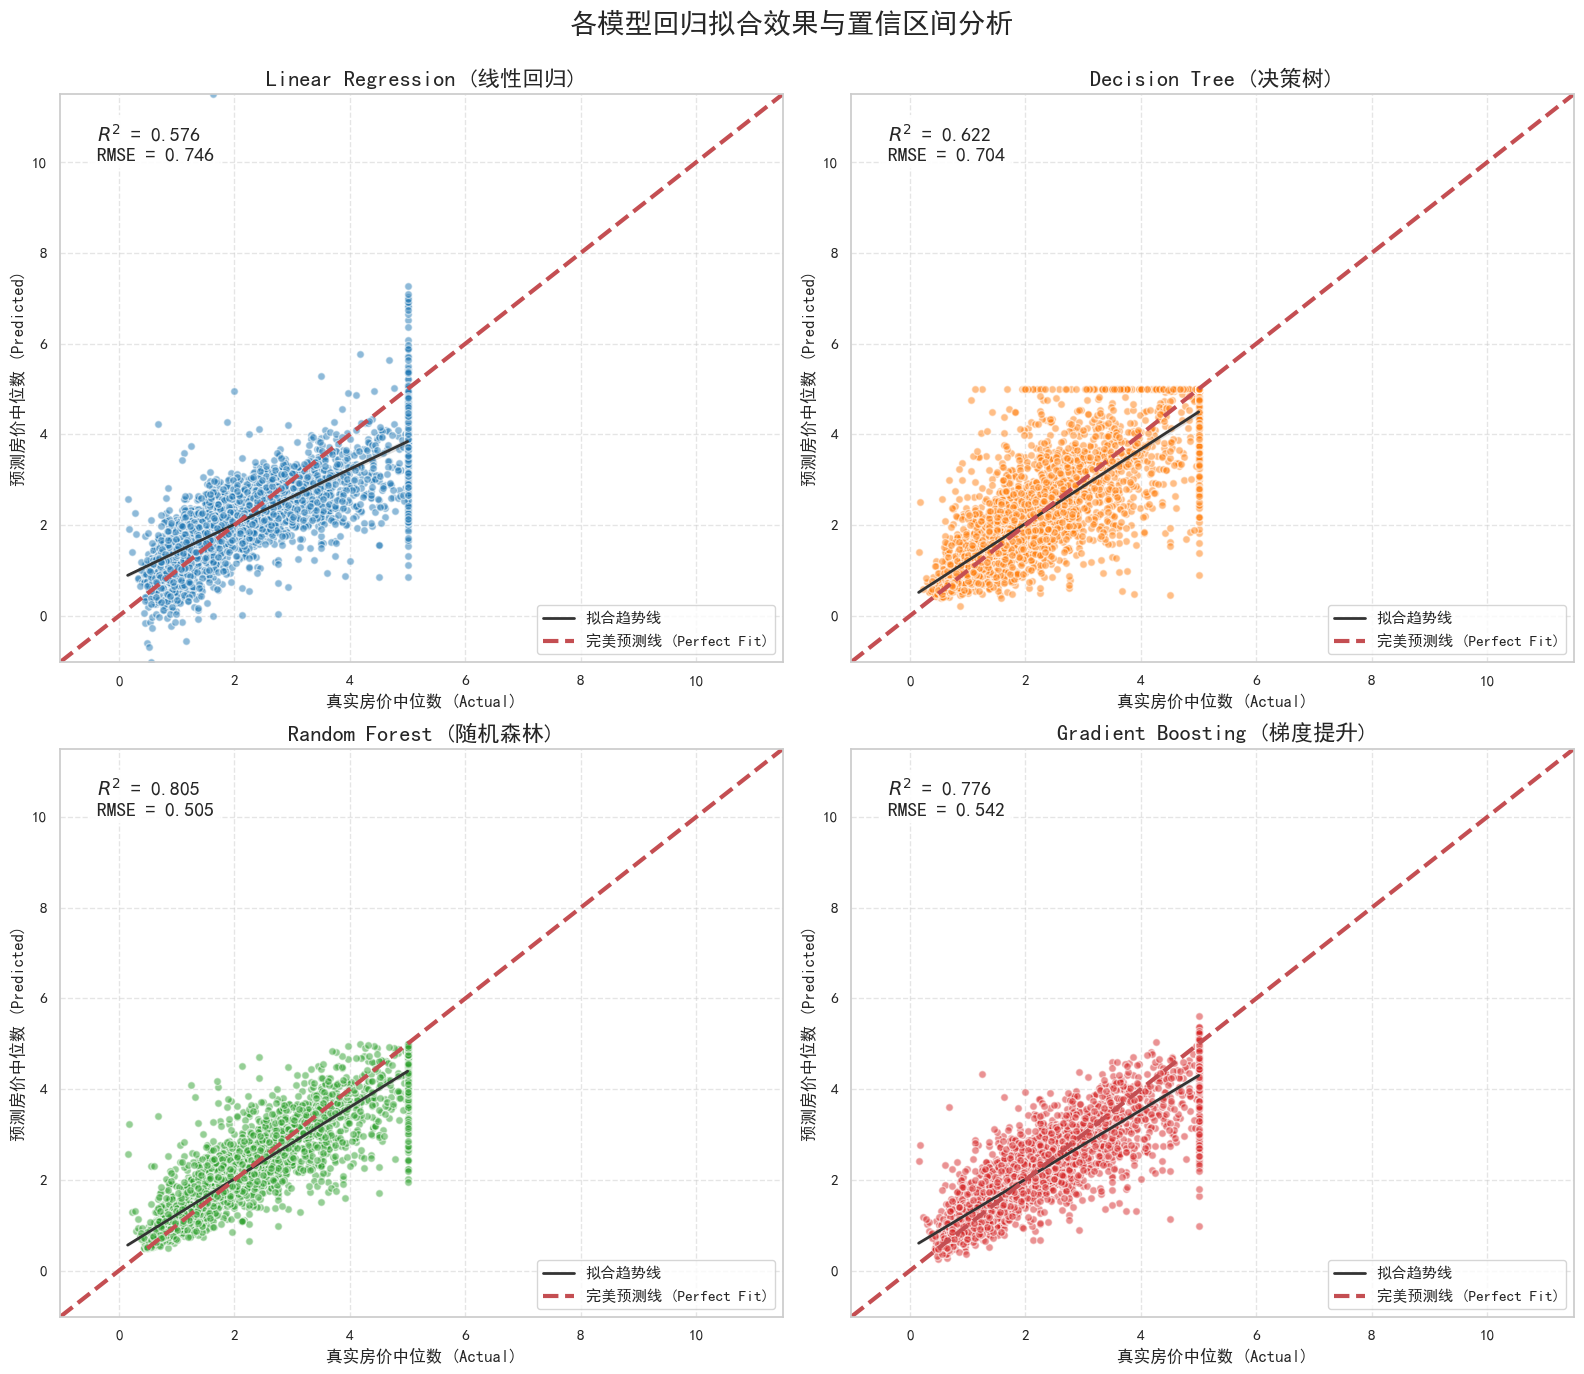

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# --- 假设前面的数据加载、切分、训练代码已经运行过 ---
# --- 直接从绘图部分开始 ---

# 1. 设置画布：2行2列
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()  # 把 2x2 的矩阵展平，方便用 [0,1,2,3] 索引遍历

# 定义颜色，每个模型一个色
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

print("正在绘制带有置信区间的单模型分析图...")

# 2. 确定坐标轴范围 (为了美观，所有子图统一范围)
# 找到所有真实值和预测值中的最大最小值
all_preds = [preds_dict[m] for m in regressors.keys()]
data_min = min(y_test.min(), np.min(all_preds))
data_max = max(y_test.max(), np.max(all_preds))


for i, (name, model) in enumerate(regressors.items()):
    ax = axes[i]
    y_pred = preds_dict[name]
    
    # --- 核心绘图函数: sns.regplot ---
    # ci=95: 自动画出 95% 的置信区间阴影
    # scatter_kws: 控制散点的样式
    # line_kws: 控制拟合线的样式
    sns.regplot(x=y_test, y=y_pred, ax=ax, 
                color=colors[i],
                ci=95,  # 【关键点】这就是你要的区间！
                scatter_kws={'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                line_kws={'color': '#333333', 'linewidth': 2, 'label': '拟合趋势线'})
    
    # --- 画出完美的对角线 (y=x) 作为基准 ---
    ax.plot([data_min, data_max], [data_min, data_max], 
            'r--', linewidth=3, label='完美预测线 (Perfect Fit)')
    
    # --- 计算指标并写在图上 ---
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 在左上角添加文本框
    text_str = f'$R^2$ = {r2:.3f}\nRMSE = {rmse:.3f}'
    ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    # --- 装饰 ---
    ax.set_title(name, fontsize=16, fontweight='bold')
    ax.set_xlabel('真实房价中位数 (Actual)', fontsize=12)
    ax.set_ylabel('预测房价中位数 (Predicted)', fontsize=12)
    ax.set_xlim(data_min, data_max)
    ax.set_ylim(data_min, data_max)
    ax.legend(loc='lower right')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.92) # 留出标题空间
plt.suptitle('各模型回归拟合效果与置信区间分析', fontsize=20)
plt.show()


正在进行 100 次随机森林 Bootstrap 重采样...
进度: .......... 完成！


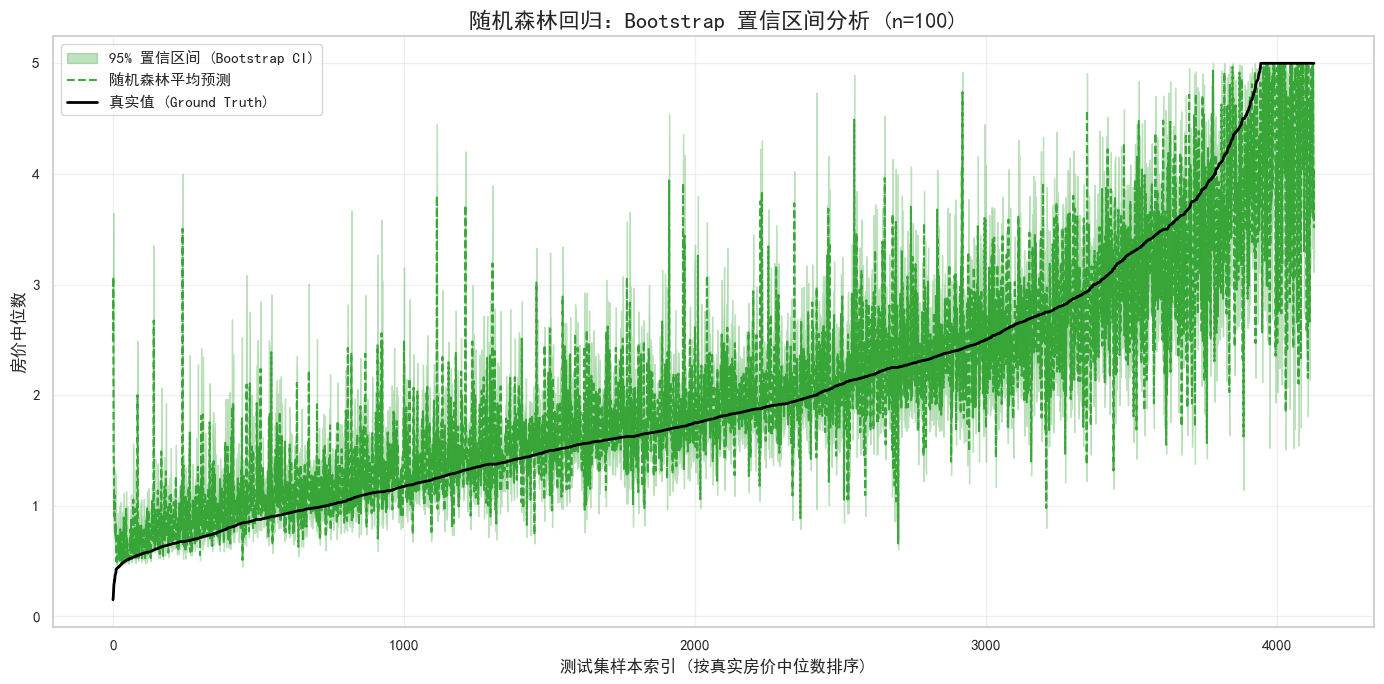

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- 1. 全局设置 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号
sns.set(style="whitegrid", font='SimHei')

# ==========================================
# 2. 加载数据 
# ==========================================
from sklearn.datasets import fetch_california_housing  
housing = fetch_california_housing(as_frame=True) 
df=housing.frame

df.columns=[
    'MedInc (中位收入)', 
    'HouseAge (房龄)', 
    'AveRooms (平均房间数)', 
    'AveBedrms (平均卧室数)', 
    'Population (人口)', 
    'AveOccup (平均居住人数)', 
    'Latitude (纬度)', 
    'Longitude (经度)', 
    'MedHouseVal (房价中位数)'
]

X=housing.data
y=housing.target

# 或者：
# X=df.iloc[:, :-1]
# y=df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 3. 随机森林 Bootstrap 核心过程 (100次)
# ==========================================
n_bootstraps = 100  # 【修改点】设为100次，精度更高
bootstrap_preds = []

print(f"\n正在进行 {n_bootstraps} 次随机森林 Bootstrap 重采样...")
print("进度: ", end="")

for i in range(n_bootstraps):
    # 打印进度条 (每10次打印一个点)
    if i % 10 == 0: print(".", end="", flush=True)
    
    # A. 重采样训练集 (有放回)
    # 模拟平行宇宙：每次生成一个新的训练集
    X_boot, y_boot = resample(X_train, y_train, random_state=i)
    
    # B. 训练模型
    # n_estimators=50: 为了速度适当减少树的数量，因为我们要训练100个模型
    rf_boot = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_boot.fit(X_boot, y_boot)
    
    # C. 预测测试集
    # 关键：所有模型都预测同一个 X_test
    y_pred_boot = rf_boot.predict(X_test)
    bootstrap_preds.append(y_pred_boot)

print(" 完成！")

# 转换为矩阵 (行: 100次模拟, 列: 测试集样本数)
bootstrap_preds = np.array(bootstrap_preds)

# ==========================================
# 4. 计算置信区间 (Confidence Interval)
# ==========================================
# 在每一列(每个样本)上，掐头去尾取中间 95%
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)
mean_pred = np.mean(bootstrap_preds, axis=0)

# ==========================================
# 5. 绘图：带状排序图 (Sorted Area Plot)
# ==========================================
# 为了画出漂亮的带状图，必须按真实值排序
plot_df = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred_mean': mean_pred,
    'ci_lower': ci_lower,
    'ci_upper': ci_upper
})
plot_df = plot_df.sort_values(by='y_true').reset_index(drop=True)

plt.figure(figsize=(14, 7))

# A. 画出 95% 置信区间 (阴影带)
plt.fill_between(plot_df.index, 
                 plot_df['ci_lower'], 
                 plot_df['ci_upper'], 
                 color='#2ca02c', alpha=0.3, label='95% 置信区间 (Bootstrap CI)')

# B. 画出平均预测线
plt.plot(plot_df.index, plot_df['y_pred_mean'], 
         color='#2ca02c', linewidth=1.5, alpha=0.9, linestyle='--', label='随机森林平均预测')

# C. 画出真实值 (基准线)
plt.plot(plot_df.index, plot_df['y_true'], 
         color='black', linewidth=2, label='真实值 (Ground Truth)')

plt.title(f'随机森林回归：Bootstrap 置信区间分析 (n={n_bootstraps})', fontsize=16)
plt.xlabel('测试集样本索引 (按真实房价中位数排序)', fontsize=12)
plt.ylabel('房价中位数', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

回归问题可以修改为分类问题，但是分类问题一般难以转化为回归模型

机器学习也有多回归任务，但是一般这类任务多采用神经网络，因为它原生支持。